<a href="https://colab.research.google.com/github/S1m4nger/ToDoApp/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22CNY_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%90%D0%B9%D1%81%D0%B5%D0%BB%D1%8C_%D0%90%D0%B1%D0%B4%D1%83%D0%BB%D0%BB%D0%B8%D0%BD%D0%BE%D0%B9%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime etna

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # для загрузки локальных файлов в облако
from etna.datasets import generate_ar_df
from etna.datasets.tsdataset import TSDataset
from scipy.stats import mstats
from sktime.utils.plotting import plot_series
from sklearn.model_selection import train_test_split

from pylab import rcParams
import seaborn as sns

import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Загрузка данных

In [ ]:
df = pd.read_csv("CNY.csv", sep = ';', decimal='.')  # загрузим данные
df.head()  # посмотрим на них

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,09/10/18,0,9.68635,9.68635,9.68635,9.68635,0
1,10/10/18,0,9.58836,9.58836,9.58836,9.58836,0
2,11/10/18,0,9.56501,9.56501,9.56501,9.56501,0
3,12/10/18,0,9.63976,9.63976,9.63976,9.63976,0
4,13/10/18,0,9.52957,9.52957,9.52957,9.52957,0


In [ ]:
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format="%d/%m/%y") #изменим тип даты
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2018-10-09,0,9.68635,9.68635,9.68635,9.68635,0
1,2018-10-10,0,9.58836,9.58836,9.58836,9.58836,0
2,2018-10-11,0,9.56501,9.56501,9.56501,9.56501,0
3,2018-10-12,0,9.63976,9.63976,9.63976,9.63976,0
4,2018-10-13,0,9.52957,9.52957,9.52957,9.52957,0


# Описательные статистики

In [ ]:
# Подсчет описательных статистик с помощью метода describe()
statistics = df.describe()
print(statistics)

NameError: name 'df' is not defined

In [ ]:
df.dtypes

<DATE>     datetime64[ns]
<TIME>              int64
<OPEN>            float64
<HIGH>            float64
<LOW>             float64
<CLOSE>           float64
<VOL>               int64
dtype: object

In [ ]:
df.index = df['<DATE>'] #сделаем индексами дату
df = df.asfreq(freq = 'D')

In [ ]:
df.index

DatetimeIndex(['2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
               '2018-10-17', '2018-10-18',
               ...
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
               '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
               '2024-03-01', '2024-03-02'],
              dtype='datetime64[ns]', name='<DATE>', length=1972, freq='D')

In [ ]:
df.sort_index(inplace=True) #Отсортируем индксы

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='<CLOSE>'>)

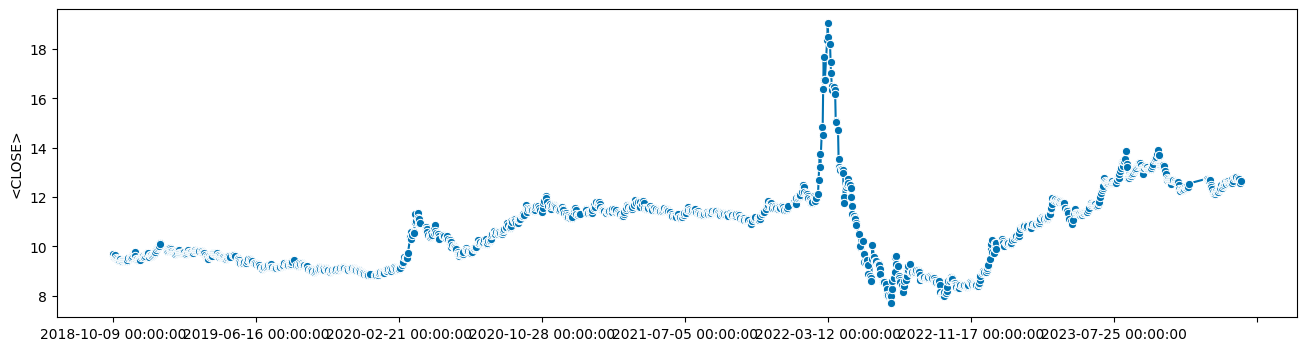

In [ ]:
plot_series(df['<CLOSE>']) #посмотрим на график временного ряда

In [ ]:
df[df['<OPEN>'] > df ['<HIGH>']] #проверка на адекватность данных

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>


# Пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2018-10-09 to 2024-03-02
Freq: D
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   1310 non-null   datetime64[ns]
 1   <TIME>   1310 non-null   float64       
 2   <OPEN>   1310 non-null   float64       
 3   <HIGH>   1310 non-null   float64       
 4   <LOW>    1310 non-null   float64       
 5   <CLOSE>  1310 non-null   float64       
 6   <VOL>    1310 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.2 KB


In [ ]:
# Создай новый индекс, включающий все дни в периоде
new_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

In [ ]:
# Переиндексируй DataFrame с использованием нового индекса
df = df.reindex(new_index)
df['<DATE>'] = new_index

In [ ]:
# Заполни пропущенные значения с помощью функции интерполяции
df['<CLOSE>'] = df['<CLOSE>'].interpolate(method='linear')

In [ ]:
# Теперь у тебя должны быть заполнены пропуски в выходные дни

# df.info() покажет, что пропусков больше нет
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2018-10-09 to 2024-03-02
Freq: D
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   1972 non-null   datetime64[ns]
 1   <TIME>   1310 non-null   float64       
 2   <OPEN>   1310 non-null   float64       
 3   <HIGH>   1310 non-null   float64       
 4   <LOW>    1310 non-null   float64       
 5   <CLOSE>  1972 non-null   float64       
 6   <VOL>    1310 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.2 KB


In [ ]:
df.head(7)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
2018-10-09,2018-10-09,0.0,9.68635,9.68635,9.68635,9.686350,0.0
2018-10-10,2018-10-10,0.0,9.58836,9.58836,9.58836,9.588360,0.0
2018-10-11,2018-10-11,0.0,9.56501,9.56501,9.56501,9.565010,0.0
2018-10-12,2018-10-12,0.0,9.63976,9.63976,9.63976,9.639760,0.0
2018-10-13,2018-10-13,0.0,9.52957,9.52957,9.52957,9.529570,0.0
2018-10-14,2018-10-14,NaN,NaN,NaN,NaN,9.517033,NaN
2018-10-15,2018-10-15,NaN,NaN,NaN,NaN,9.504497,NaN


# Проверка на выбросы

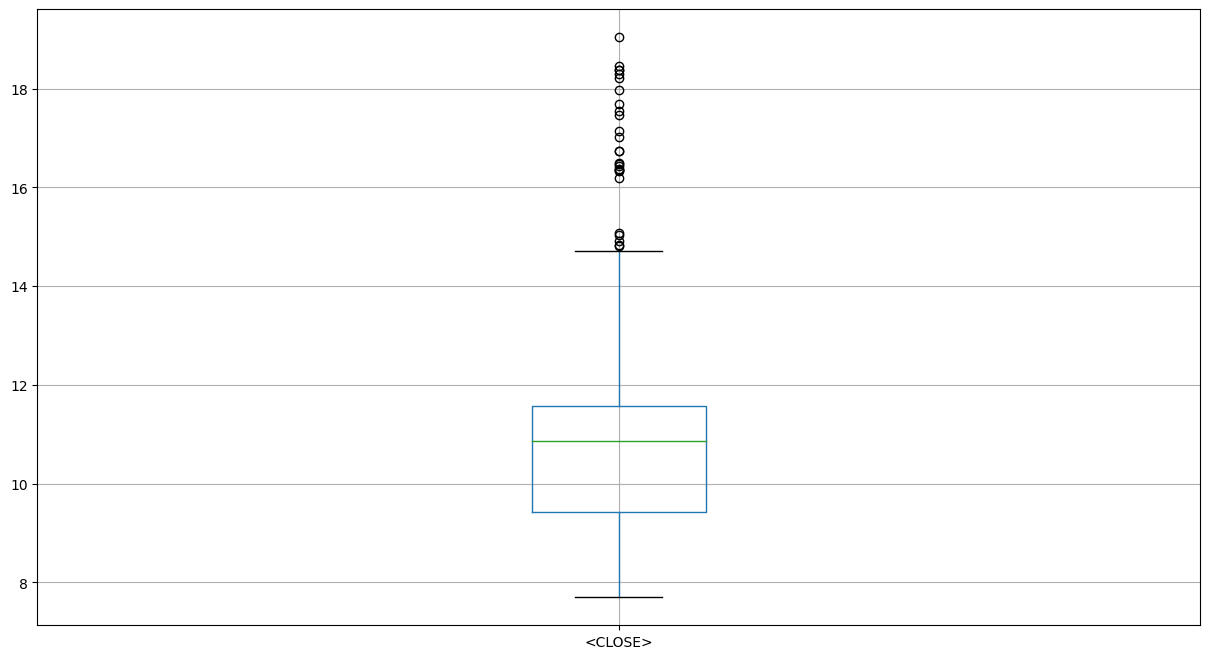

In [ ]:
boxplot = df.boxplot(column=['<CLOSE>']) #посмотрели на выбросы с помощью ящика с усами

In [ ]:
# Нахождение первого и третьего квартилей
Q1 = df['<CLOSE>'].quantile(0.25)
Q3 = df['<CLOSE>'].quantile(0.75)

# Вычисление межквартильного размаха
IQR = Q3 - Q1

# Определение нижней и верхней границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Замена выбросов на более робастные значения
df['<CLOSE>'] = np.where(df['<CLOSE>'] < lower_bound, lower_bound, df['<CLOSE>'])
df['<CLOSE>'] = np.where(df['<CLOSE>'] > upper_bound, upper_bound, df['<CLOSE>'])

<Axes: >

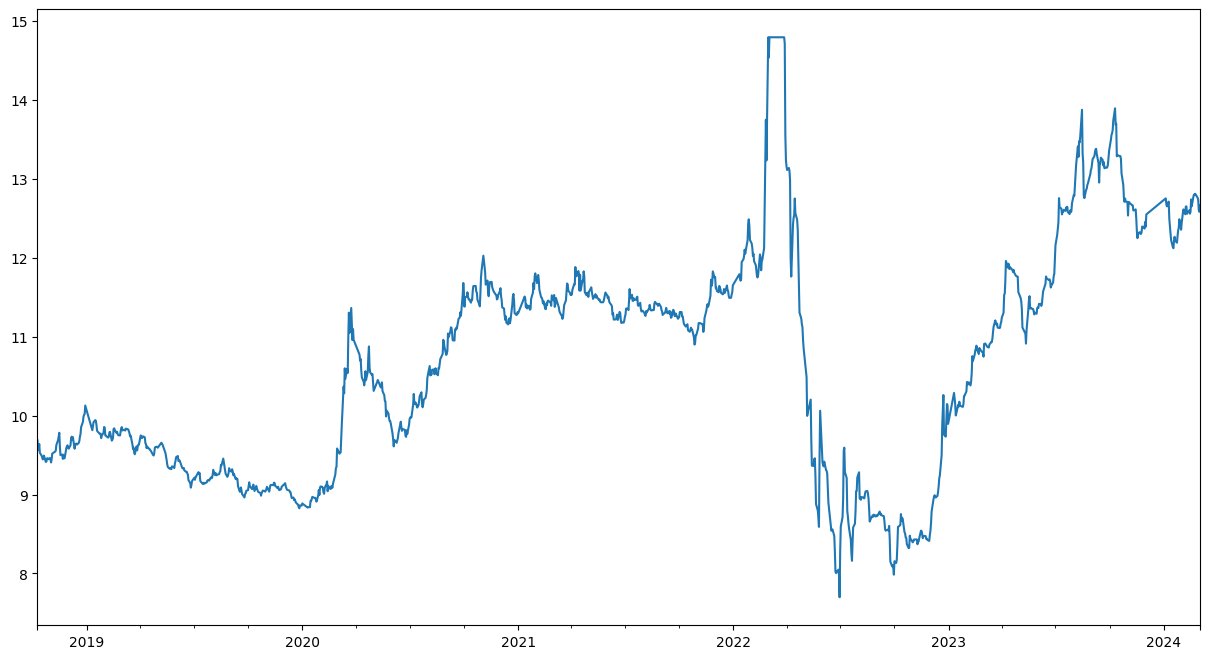

In [ ]:
df['<CLOSE>'].plot()

ETNA

In [ ]:
df_etna = pd.DataFrame(columns = ['segment', 'timestamp', 'target'])

In [ ]:
df_etna['timestamp'] = df['<DATE>']
df_etna['target'] = df['<CLOSE>']
df_etna['segment'] = 'segment_0'

In [ ]:
df_etna.head(7)

,segment,timestamp,target
2024-01-04,segment_0,2024-01-04,12.752000
2024-01-05,segment_0,2024-01-05,12.676000
2024-01-06,segment_0,2024-01-06,12.650000
2024-01-07,segment_0,2024-01-07,12.670333
2024-01-08,segment_0,2024-01-08,12.690667
2024-01-09,segment_0,2024-01-09,12.711000
2024-01-10,segment_0,2024-01-10,12.493500


In [ ]:
df_ts_format = TSDataset.to_dataset(df_etna)

In [ ]:
ts = TSDataset(df_ts_format, "D")

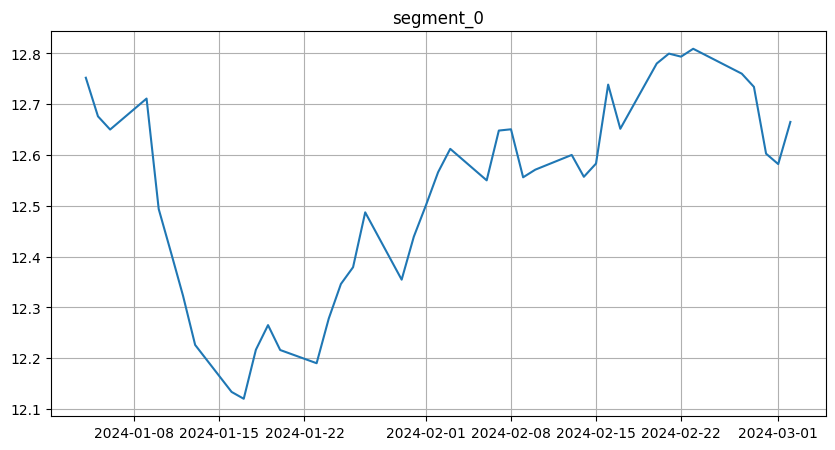

In [ ]:
ts.plot()

In [ ]:
df_etna['target'] = mstats.winsorize(df_etna['target'], limits=[0, 0.1])
df_ts_format = TSDataset.to_dataset(df_etna)
ts = TSDataset(df_ts_format, "D")

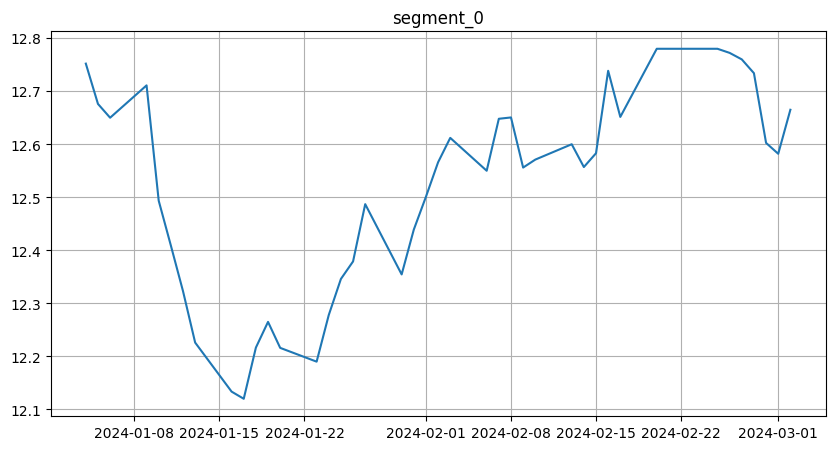

In [ ]:
ts.plot()

In [ ]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-01",
    train_end="2022-12-31",
    test_start="2023-01-01",
    test_end="2023-12-02",
)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:1010: UserWarning: Min timestamp in df is 2024-01-04 00:00:00.
  warnings.warn(f"Min timestamp in df is {self.df.index.min()}.")
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:143: UserWarning: TSDataset freq can't be inferred
  warnings.warn("TSDataset freq can't be inferred")
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:147: UserWarning: You probably set wrong freq. Discovered freq in you data is None, you set D
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:143: UserWarning: TSDataset freq can't be inferred
  warnings.warn("TSDataset freq can't be inferred")
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:147: UserWarning: You probably set wrong freq. Discovered freq in you data is None, you set D
  warnings.warn(


In [ ]:
HORIZON = 336
from etna.models import NaiveModel

# Fit the model
model = NaiveModel(lag=180)
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model.context_size)
forecast_ts = model.forecast(future_ts, prediction_size=HORIZON)

KeyError: NaT

In [ ]:
from etna.metrics import SMAPE

In [ ]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

In [ ]:
from etna.analysis import plot_forecast

In [ ]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=1500)

In [ ]:
train_ts.plot()

In [ ]:
ts.info()

In [ ]:
df.info()

In [ ]:
df.head(7)

In [ ]:
data = pd.DataFrame(columns=['Y'])
data['Y'] = df['<CLOSE>']
data.index = df['<DATE>']
data = data.asfreq(freq = 'D')
data.head(7)

,Y
<DATE>,
2018-10-09,9.686350
2018-10-10,9.588360
2018-10-11,9.565010
2018-10-12,9.639760
2018-10-13,9.529570
2018-10-14,9.517033
2018-10-15,9.504497


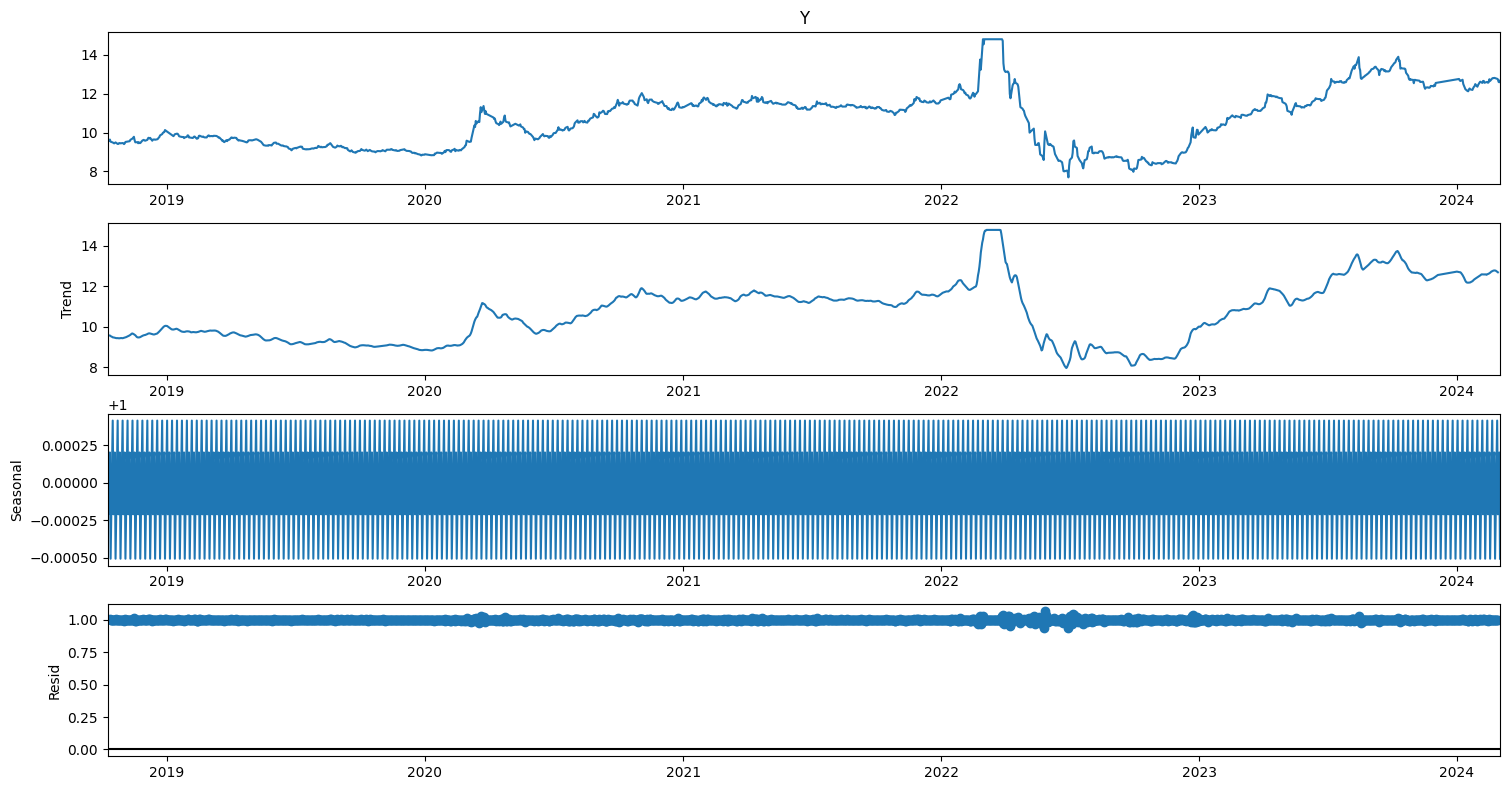

In [ ]:
decompose_result = seasonal_decompose(data['Y'], model = 'multiplicative')
decompose_result.plot()
plt.show()

<Axes: xlabel='<DATE>'>

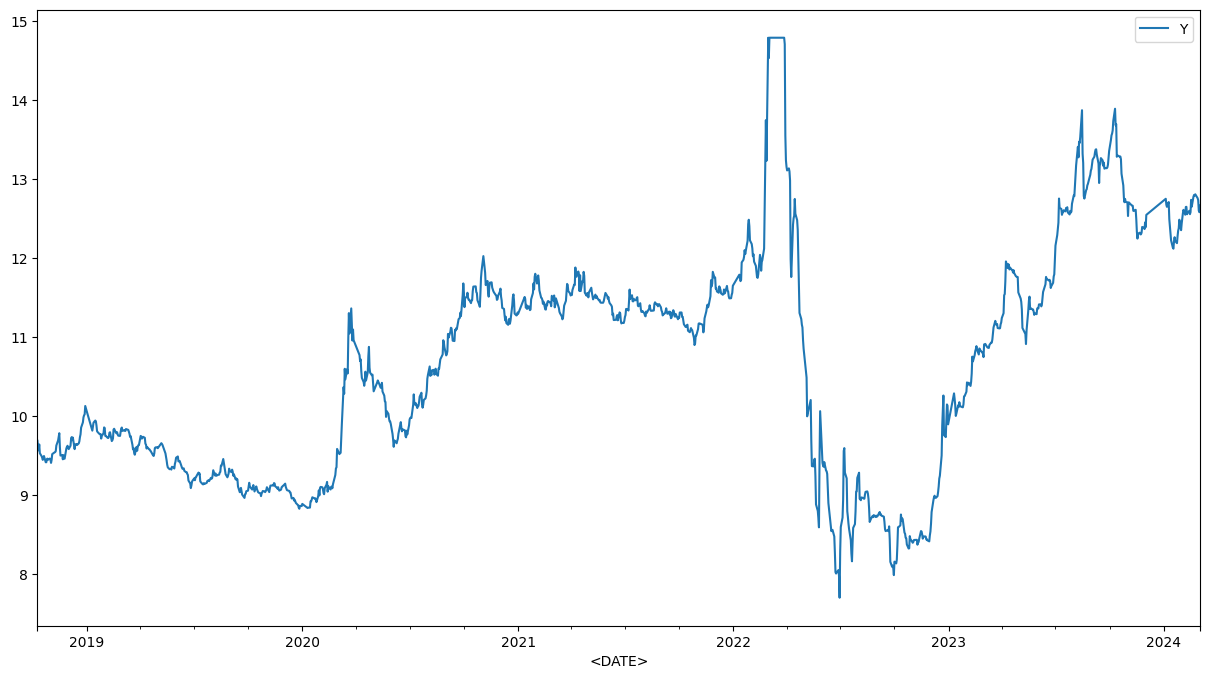

In [ ]:
data.plot()

# Тренировочные и тестовые наборы

In [ ]:
train=data['2018':'2022']
train.head()

,Y
<DATE>,
2018-10-09,9.68635
2018-10-10,9.58836
2018-10-11,9.56501
2018-10-12,9.63976
2018-10-13,9.52957


In [ ]:
test=data['2023':'2024']
test.head()

,Y
<DATE>,
2023-01-01,9.934098
2023-01-02,9.973276
2023-01-03,10.012454
2023-01-04,10.051632
2023-01-05,10.090810


In [ ]:
fit1 = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='mul').fit()

In [ ]:
fit1.params

{'smoothing_level': 0.9999999850988375,
 'smoothing_trend': 0.0465519988593862,
 'smoothing_seasonal': 2.200330253126295e-09,
 'damping_trend': nan,
 'initial_level': 9.475371376610843,
 'initial_trend': -0.006654530449986747,
 'initial_seasons': array([1.02296722, 1.02244698, 1.02373182, 1.02391376, 1.02250581,
        1.02156272, 1.02126794, 1.02149163, 1.01986607, 1.01997258,
        1.0210824 , 1.02264386]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
fit1.fittedvalues

<DATE>
2018-10-09     9.686187
2018-10-10     9.674628
2018-10-11     9.589583
2018-10-12     9.554738
2018-10-13     9.618502
                ...    
2022-12-27     9.758896
2022-12-28     9.753597
2022-12-29     9.981049
2022-12-30    10.195022
2022-12-31    10.157311
Freq: D, Length: 1545, dtype: float64

In [ ]:
test_predictions = fit1.forecast(180)
test_predictions.index = pd.date_range (start='1/1/2023', freq='D', periods=180)
test_predictions

2023-01-01     9.926574
2023-01-02     9.968029
2023-01-03    10.013973
2023-01-04    10.047850
2023-01-05    10.073435
                ...    
2023-06-25    15.323136
2023-06-26    15.339671
2023-06-27    15.365904
2023-06-28    15.399936
2023-06-29    15.406046
Freq: D, Length: 180, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='<DATE>'>

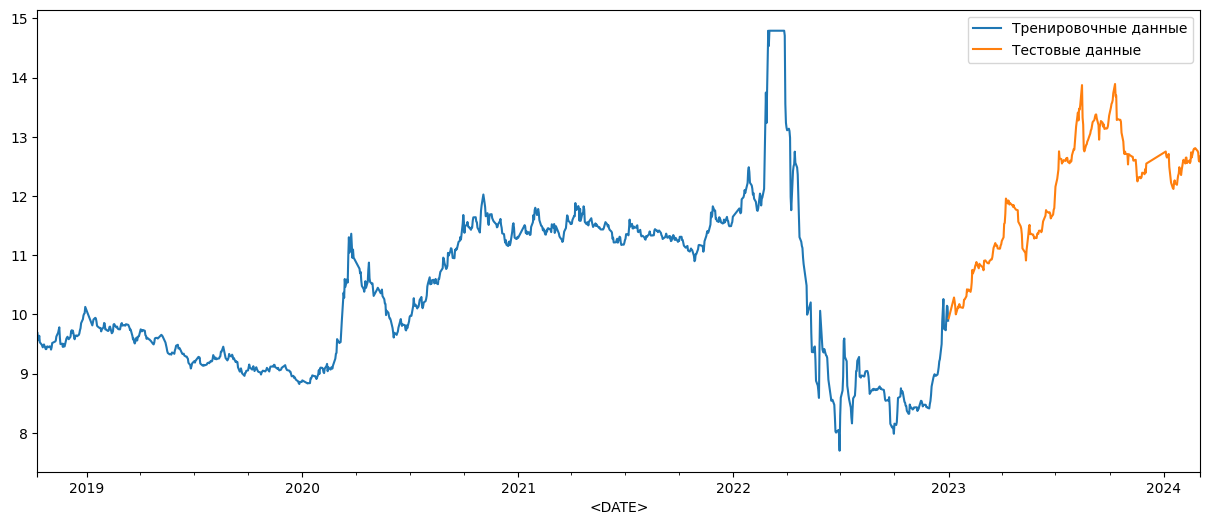

In [ ]:
fitted_model = ExponentialSmoothing(train['Y'], trend = 'mul', seasonal = 'mul', seasonal_periods = 365).fit()
test_predictions = fitted_model.forecast(336)
train['Y'].plot(figsize=(15,6), legend = True, label = 'Тренировочные данные')
test['Y'].plot(legend = True, label = 'Тестовые данные')
#test_predictions.plot(legend = True, label = 'Прогноз')

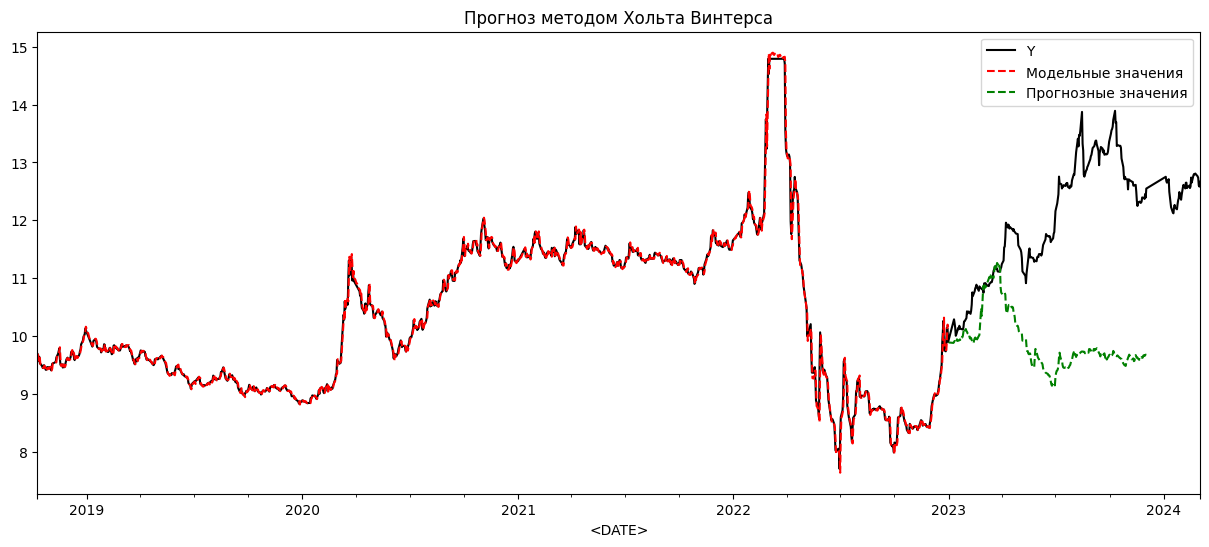

In [ ]:
ax = data.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red', legend = True, label = 'Модельные значения')
test_predictions.plot(ax=ax, style='--', color='green',legend = True,  label = 'Прогнозные значения')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_error(test['Y'], test_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [427, 336]

In [ ]:
mean_absolute_percentage_error(test['Y'], test_predictions)

In [ ]:
mean_squared_error(test['Y'], test_predictions)

# Прогноз методом SARIMA

In [ ]:
!pip install pmdarima
!pip install arch

In [ ]:
# загрузим нужные библиотеки
import pandas as pd  # для поддержки серий и датафреймов
import numpy as np  # для работы с numpy-массивами
import matplotlib.pyplot as plt  # для визуализации
import sklearn.metrics as metrics  # метрики качества моделей
import statsmodels.api as sm  # для применения МНК
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # ETS-модели
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # коррелограммы
from statsmodels.tsa.arima.model import ARIMA  # ARIMA-модели
import pmdarima  # автоподбор параметров ARIMA-модели
from statsmodels.tsa.stattools import adfuller  # ADF-тест на стационарность
from statsmodels.tsa.seasonal import seasonal_decompose, STL  # декомпозиция ряда
from statsmodels.stats.diagnostic import acorr_ljungbox  # тест на автокорреляцию
from scipy.stats import shapiro  # тест на нормальность
from statsmodels.stats.diagnostic import het_arch  # тест на наличие ARCH-эффектов
import arch  # GARCH-модели

In [ ]:
# установим размер холста с графиками, чтобы не был слишком мелким
plt.rcParams["figure.figsize"] = 15, 8  # width, height

In [ ]:
Y = data

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2018-10-09 to 2024-03-02
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1972 non-null   float64
dtypes: float64(1)
memory usage: 95.4 KB


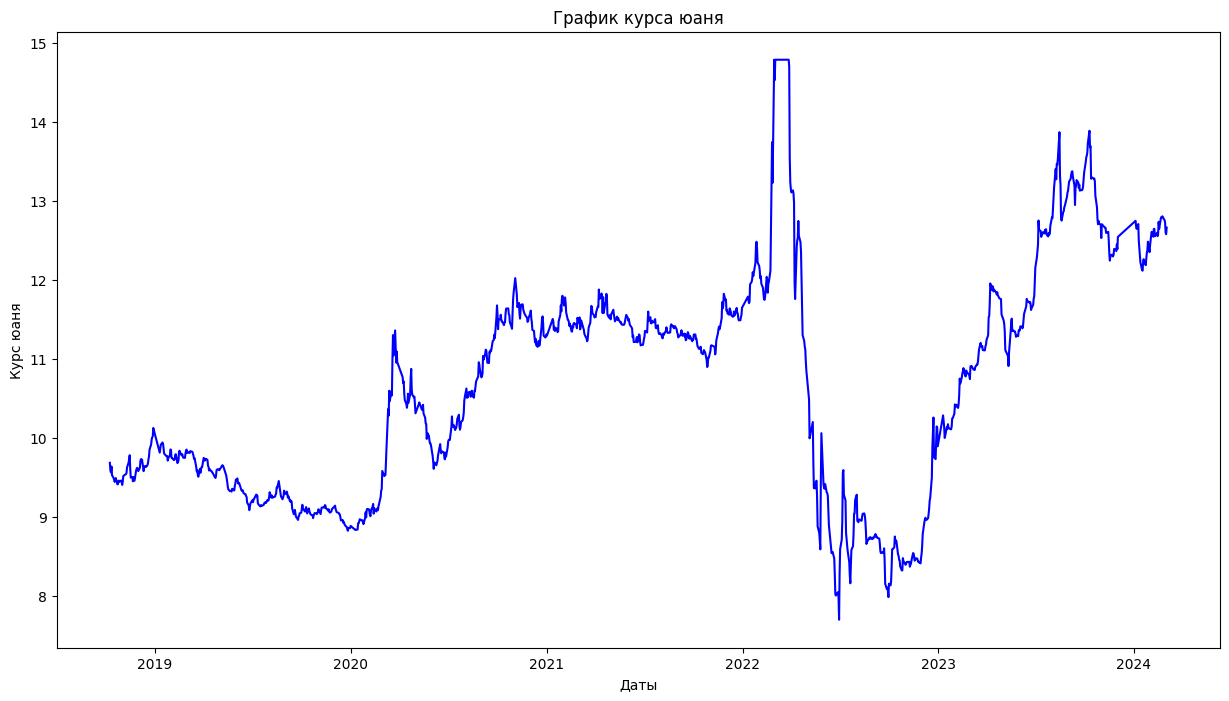

In [ ]:
# построим график
plt.plot(Y, color="blue")
plt.ylabel("Курс юаня")
plt.xlabel("Даты")
plt.title("График курса юаня");

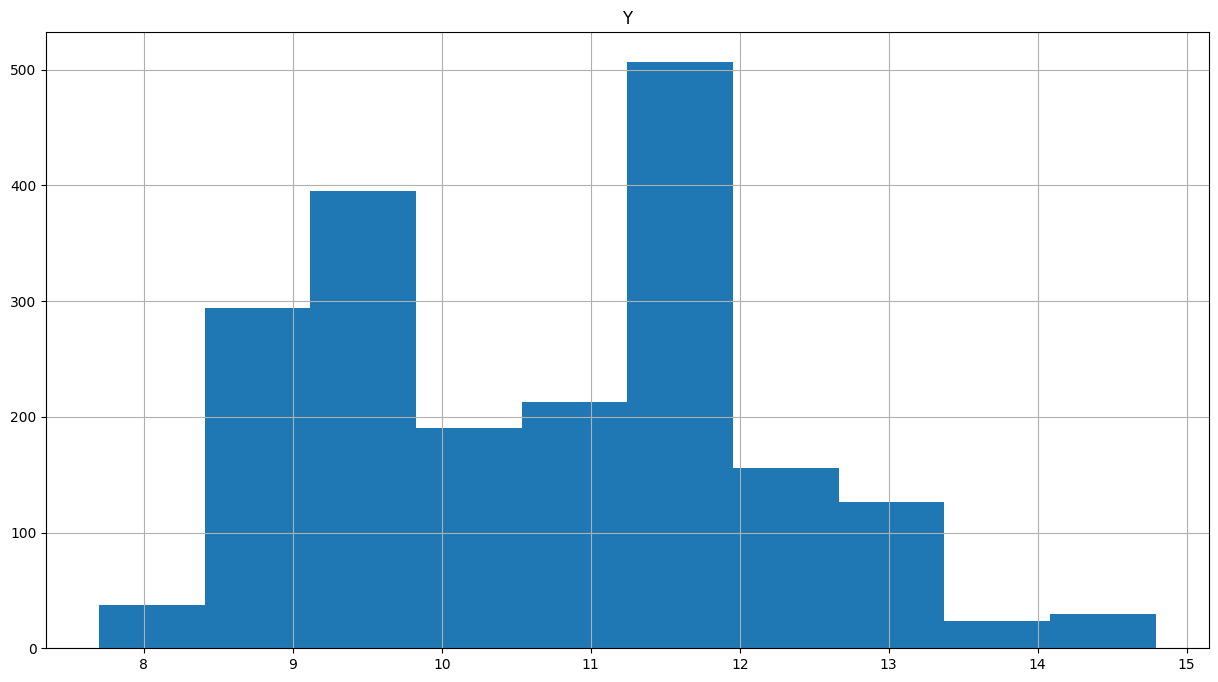

In [ ]:
# гистограмма
Y.hist();

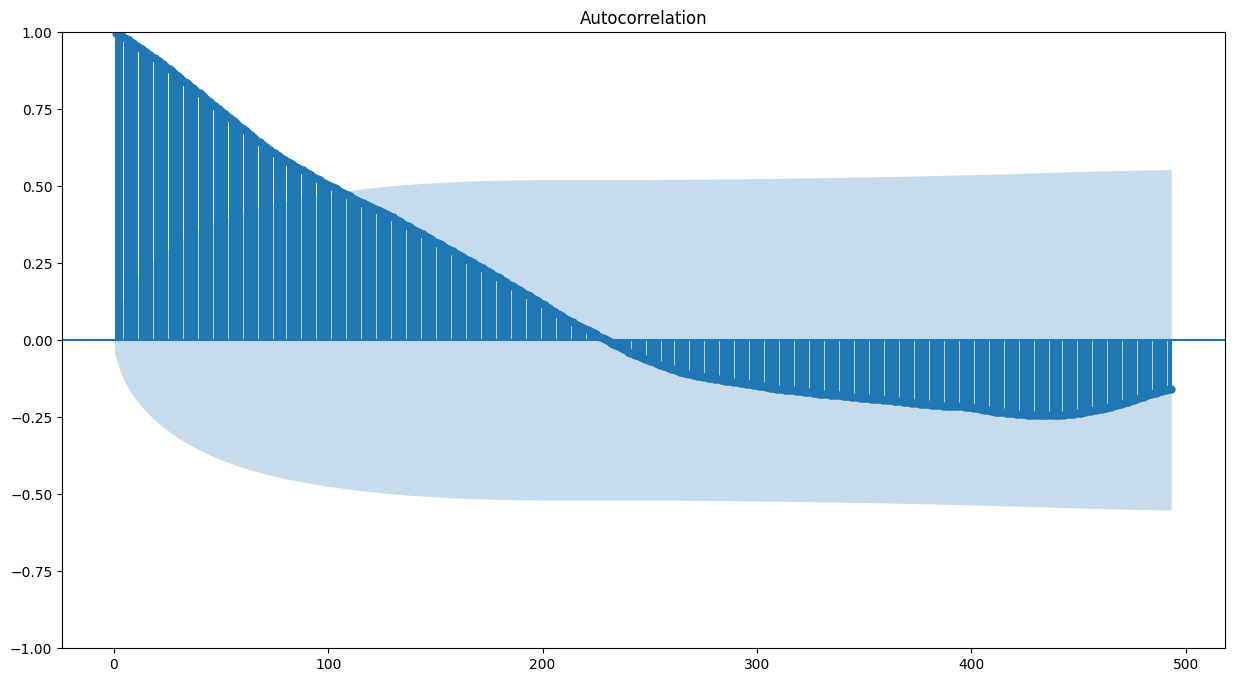

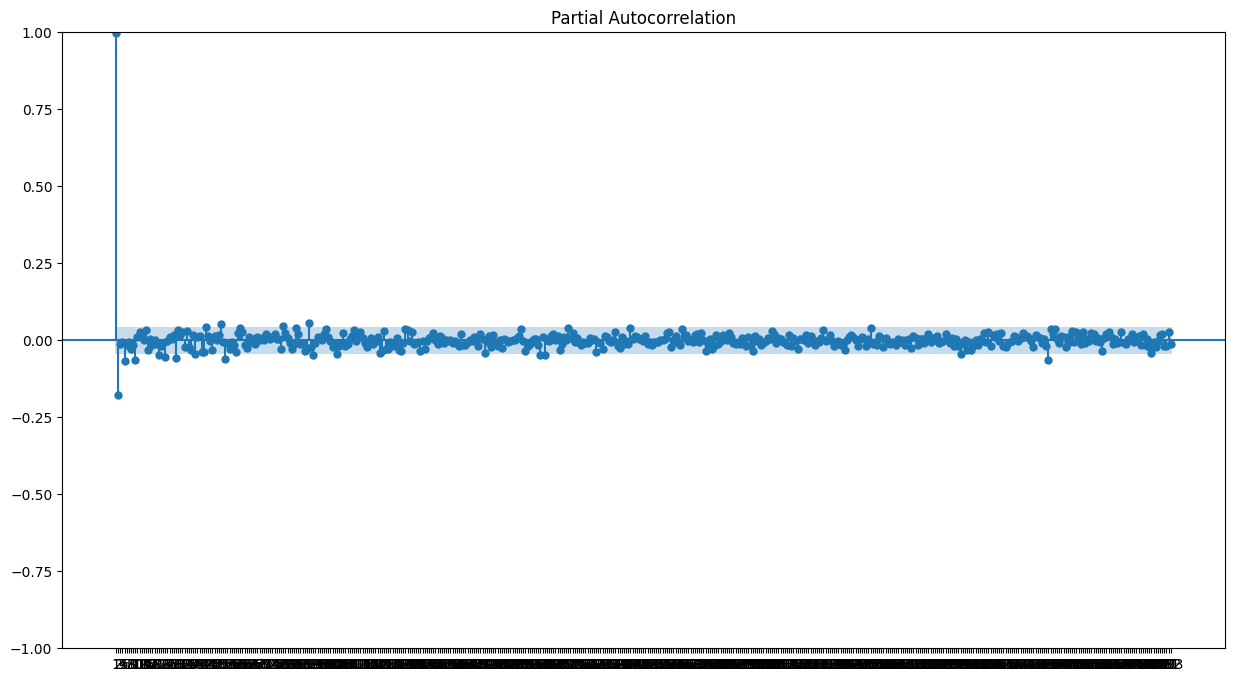

In [ ]:
# коррелограммы
plot_acf(Y, zero=False, lags=len(Y) // 4)
plot_pacf(Y, method="ywm", zero=False, lags=len(Y) // 4)
plt.xticks(range(1, len(Y) // 4 + 1));

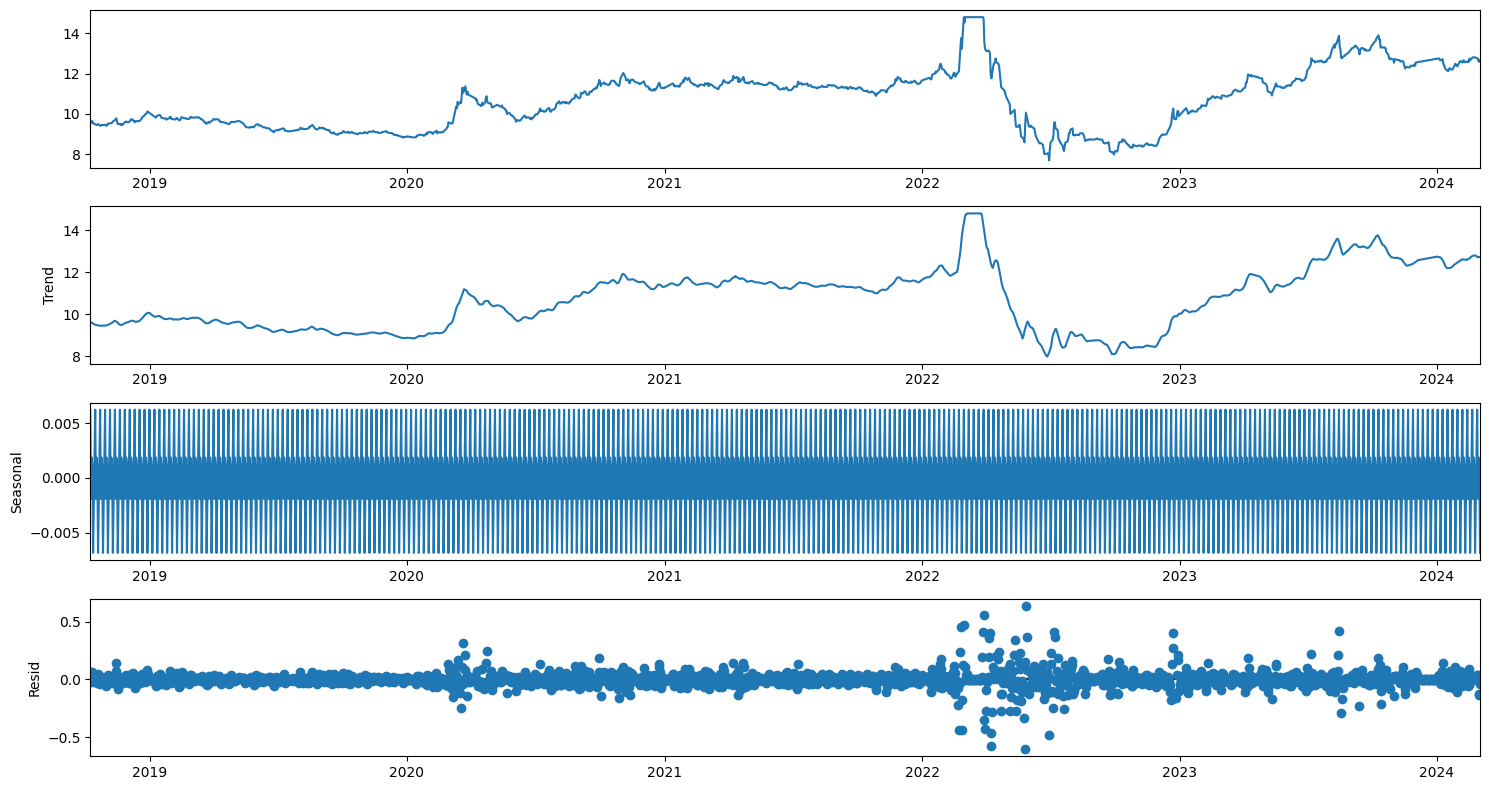

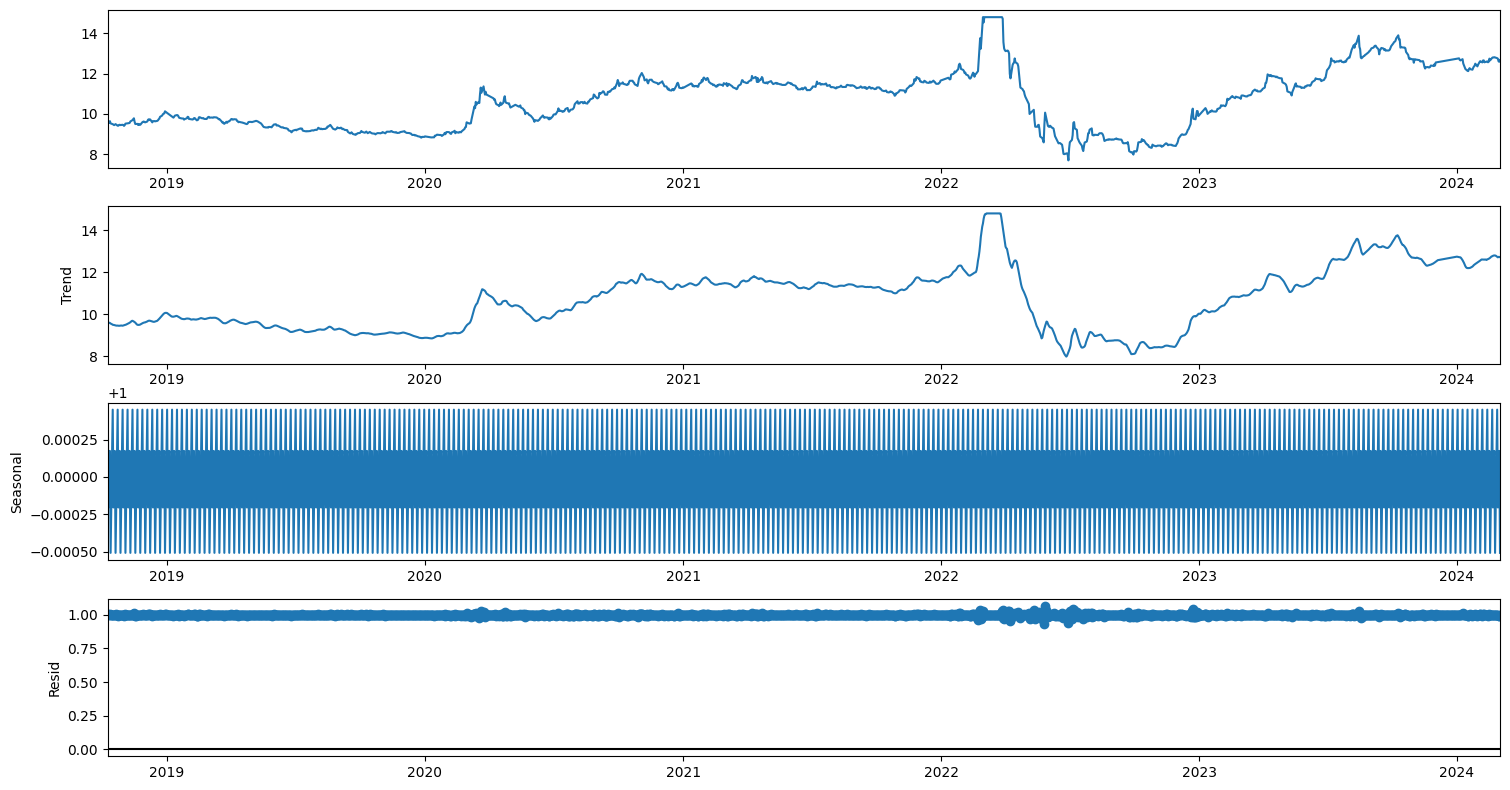

In [ ]:
# декомпозиция: скользящее среднее
decomp_ma_add = seasonal_decompose(Y, model="additive", extrapolate_trend="freq")
decomp_ma_mul = seasonal_decompose(Y, model="multiplicative", extrapolate_trend="freq")
decomp_ma_add.plot()
decomp_ma_mul.plot();

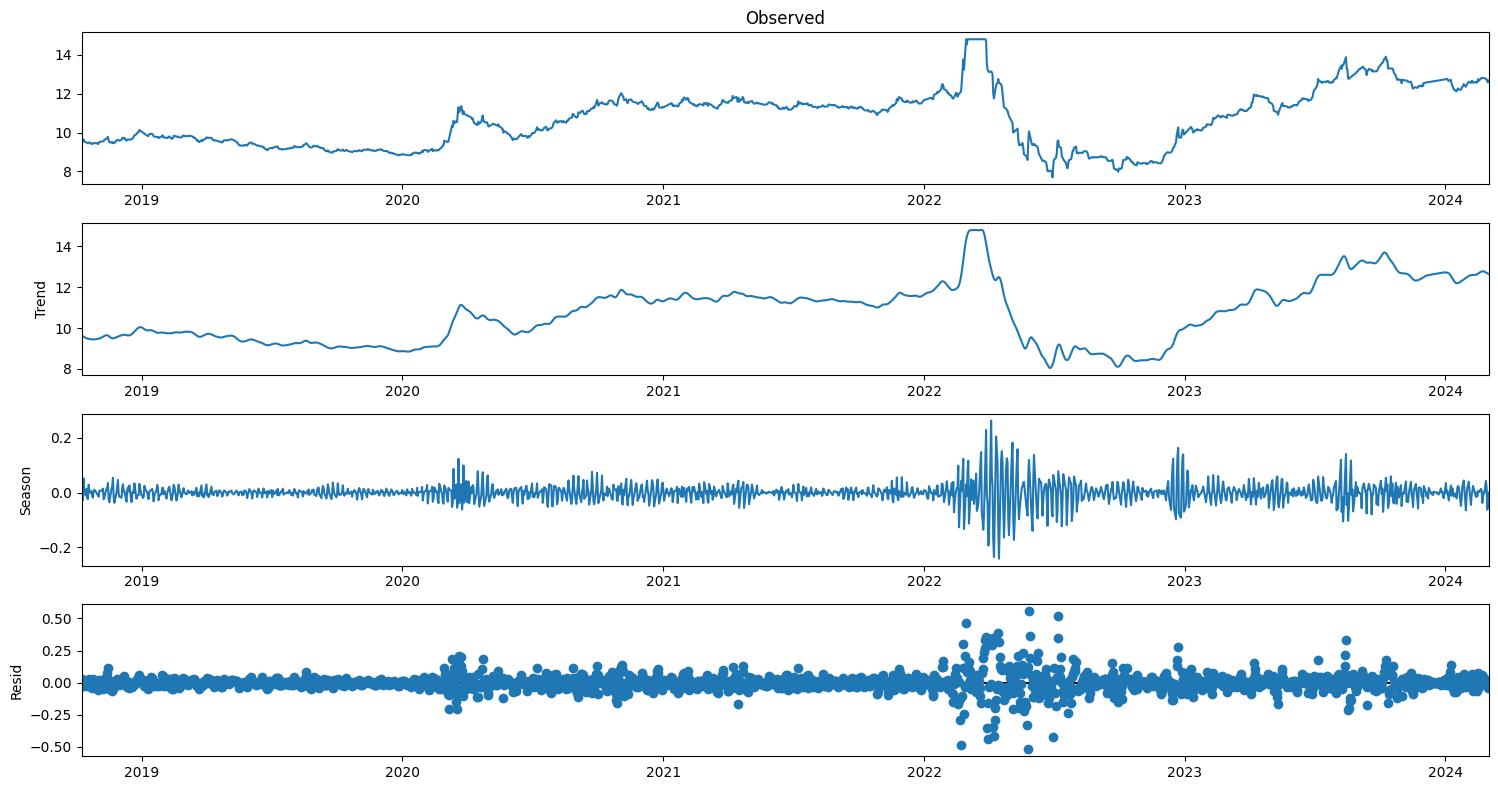

In [ ]:
# LOESS
decomp_LOESS = STL(Y).fit()
decomp_LOESS.plot();

In [ ]:
# у какого метода в среднем меньше остатки?
decomp_ma_add.resid.abs().mean(), \
decomp_ma_mul.resid.abs().mean(), \
decomp_LOESS.resid.abs().mean()

(0.03841917724966002, 0.9999629326516787, 0.03843214431826236)

In [ ]:
# тест на стационарность (H0: нестационарный)
adfuller(Y)[1]

0.2541536191481549

In [ ]:
# попробуем тренды порядков 1, 2, 3

# тренд 1го порядка (линейный)
t = np.array(range(1, len(Y) + 1))
t1_trend_df = pd.DataFrame([1] * len(Y), columns=["const"], index=Y.index)
t1_trend_df["t"] = t

t1_trend_model = sm.OLS(Y, t1_trend_df).fit()  # построение модели
t1_trend_model.summary()  # вывод подробной информации о модели

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     725.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.36e-136
Time:                        14:26:21   Log-Likelihood:                -3211.2
No. Observations:                1972   AIC:                             6426.
Df Residuals:                    1970   BIC:                             6438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3956      0.056    169.043      0.000       9.287       9.505
t              0.0013   4.88e-05     26.939      0.000       0.001       0.001
==============================================================================
Omnibus:                      106.913   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.677
Skew:                          -0.471   Prob(JB):                     9.51e-35
Kurtosis:                       4.009   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициенты модели:<br>
$y_t=9.4621+	0.0012t+\varepsilon_t$<br>
Свободный член **9.4621** не интерпретируется, потому что непонятно, что такое нулевой момент времени.<br>
Коэффициент при t **0.0012**: среднее приращение курса юаня к рублю за день (в процентных пунктах).

In [ ]:
# тренд 2го порядка
t2_trend_df = pd.DataFrame([1] * len(Y), columns=["const"], index=Y.index)
t = np.array(range(1, len(Y) + 1))
t2_trend_df["t"] = t
t2_trend_df["t2"] = t ** 2

t2_trend_model = sm.OLS(Y, t2_trend_df).fit()  # построение модели
t2_trend_model.summary()  # вывод подробной информации о модели

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     362.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.90e-135
Time:                        14:26:21   Log-Likelihood:                -3211.2
No. Observations:                1972   AIC:                             6428.
Df Residuals:                    1969   BIC:                             6445.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3863      0.083    112.485      0.000       9.223       9.550
t              0.0013      0.000      6.875      0.000       0.001       0.002
t2         -1.433e-08   9.59e-08     -0.149      0.881   -2.02e-07    1.74e-07
==============================================================================
Omnibus:                      107.905   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.948
Skew:                          -0.475   Prob(JB):                     5.04e-35
Kurtosis:                       4.010   Cond. No.                     5.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# тренд 3го порядка
t3_trend_df = t2_trend_df.copy()
t3_trend_df["t3"] = t ** 3

t3_trend_model = sm.OLS(Y, t3_trend_df).fit()  # построение модели
t3_trend_model.summary()  # вывод подробной информации о модели

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     316.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.41e-168
Time:                        14:26:21   Log-Likelihood:                -3131.8
No. Observations:                1972   AIC:                             6272.
Df Residuals:                    1968   BIC:                             6294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4763      0.107     79.223      0.000       8.266       8.686
t              0.0069      0.000     14.634      0.000       0.006       0.008
t2         -7.017e-06   5.53e-07    -12.691      0.000    -8.1e-06   -5.93e-06
t3          2.366e-09   1.84e-10     12.844      0.000       2e-09    2.73e-09
==============================================================================
Omnibus:                       45.209   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.103
Skew:                           0.001   Prob(JB):                     3.02e-22
Kurtosis:                       4.098   Cond. No.                     1.16e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# попробуем экспоненциальный тренд

exp_trend_model = sm.OLS(np.log(Y), t1_trend_df).fit()  # построение модели
exp_trend_model.summary()  # вывод информации
# модель предсказывает логарифмы Y, ее прогнозы нужно экспоненцировать

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     652.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.29e-124
Time:                        14:26:21   Log-Likelihood:                 1445.3
No. Observations:                1972   AIC:                            -2887.
Df Residuals:                    1970   BIC:                            -2876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2445      0.005    428.262      0.000       2.234       2.255
t              0.0001    4.6e-06     25.551      0.000       0.000       0.000
==============================================================================
Omnibus:                      184.727   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.259
Skew:                          -0.769   Prob(JB):                     3.35e-54
Kurtosis:                       3.793   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

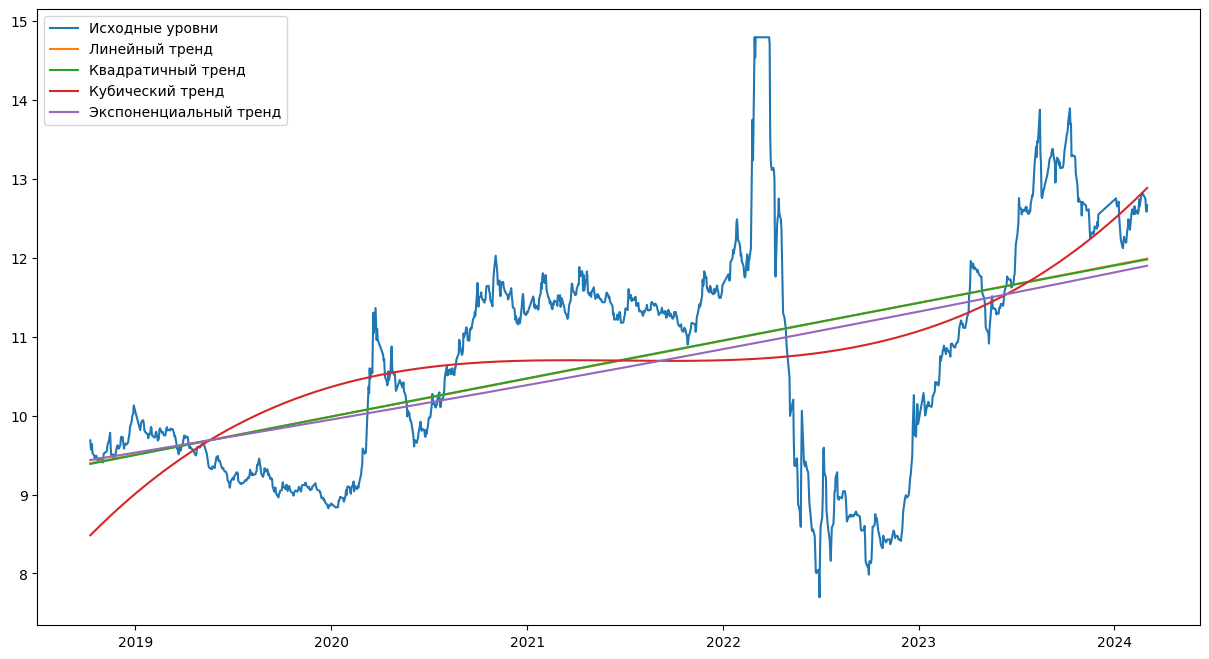

In [ ]:
# построим графики
plt.plot(Y, label="Исходные уровни")
plt.plot(t1_trend_model.fittedvalues, label="Линейный тренд")
plt.plot(t2_trend_model.fittedvalues, label="Квадратичный тренд")
plt.plot(t3_trend_model.fittedvalues, label="Кубический тренд")
plt.plot(np.exp(exp_trend_model.fittedvalues), label="Экспоненциальный тренд")
plt.legend();

In [ ]:
# попробуем ARIMA (auto)
model_arima_auto = pmdarima.auto_arima(Y)
model_arima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1972
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1978.912
Date:                Sun, 10 Mar 2024   AIC                          -3953.824
Time:                        14:26:33   BIC                          -3942.652
Sample:                    10-09-2018   HQIC                         -3949.719
                         - 03-02-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2338      0.008     27.586      0.000       0.217       0.250
sigma2         0.0079   5.68e-05    138.356      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            112735.36
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.47   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

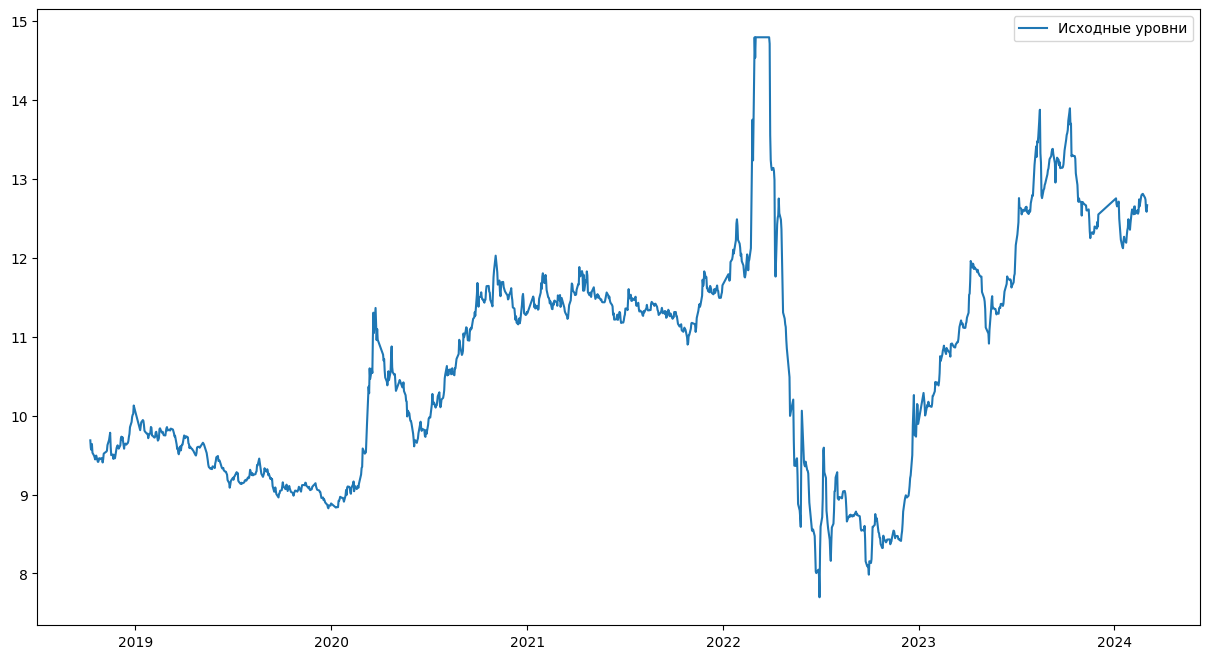

In [ ]:
# построим график
plt.plot(Y, label="Исходные уровни")
#plt.plot(model_arima_auto.fittedvalues(), label="SARIMAX(3, 1, 3)")
plt.legend();

In [ ]:
train = Y[:-360]  # обучающая выборка
test = Y[-360:]  # тестовая выборка

# ARIMA
model_arima = pmdarima.auto_arima(train)
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1612
Model:               SARIMAX(3, 1, 2)   Log Likelihood                1592.235
Date:                Sun, 10 Mar 2024   AIC                          -3172.470
Time:                        14:27:28   BIC                          -3140.163
Sample:                    10-09-2018   HQIC                         -3160.478
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2471      0.016     15.733      0.000       0.216       0.278
ar.L2         -0.9850      0.007   -132.157      0.000      -1.000      -0.970
ar.L3          0.2423      0.012     19.846      0.000       0.218       0.266
ma.L1          0.0204      0.010      1.946      0.052      -0.000       0.041
ma.L2          0.9751      0.010     97.789      0.000       0.956       0.995
sigma2         0.0081   7.81e-05    103.312      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             93751.35
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               6.92   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test

,Y
<DATE>,
2023-03-09,10.86475
2023-03-10,10.86230
2023-03-11,10.89950
2023-03-12,10.91010
2023-03-13,10.92070
...,...
2024-02-27,12.76000
2024-02-28,12.73400
2024-02-29,12.60250


In [ ]:
arima_pred = model_arima.predict(n_periods=180)
arima_pred

2023-03-09    10.856718
2023-03-10    10.853429
2023-03-11    10.860954
2023-03-12    10.863513
2023-03-13    10.855937
                ...    
2023-08-31    10.859811
2023-09-01    10.857867
2023-09-02    10.857001
2023-09-03    10.858914
2023-09-04    10.859769
Freq: D, Length: 180, dtype: float64

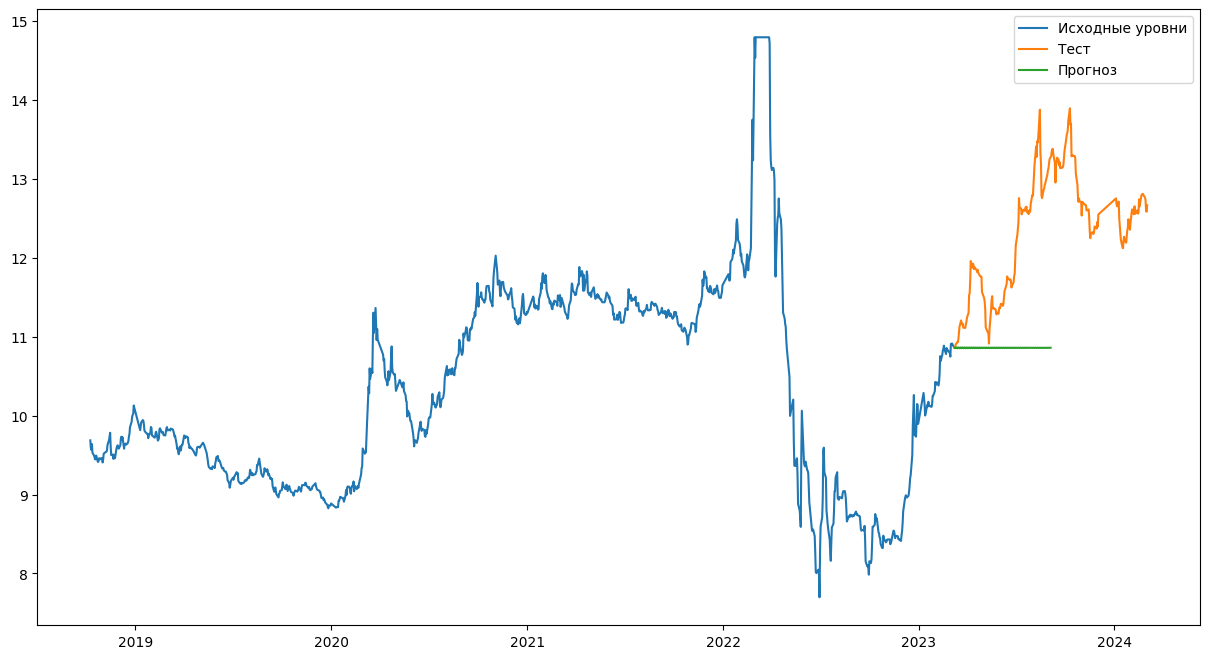

In [ ]:
#print(metrics.mean_absolute_percentage_error(test, arima_pred))

# построим график
plt.plot(train, label="Исходные уровни")
plt.plot(test, label="Тест")
plt.plot(arima_pred, label="Прогноз")
plt.legend();

In [ ]:
train=data['2018':'2022']
test=data['2023':'2024']

In [ ]:
train = Y[:-240]  # обучающая выборка
test = Y[-240:]  # тестовая выборка

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = 5
d = 2
q = 2
model = SARIMAX(train, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: solver. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
fcast = model_fit.get_prediction(start=len(train.Y), end=len(train.Y)+len(test.Y)+30)
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()

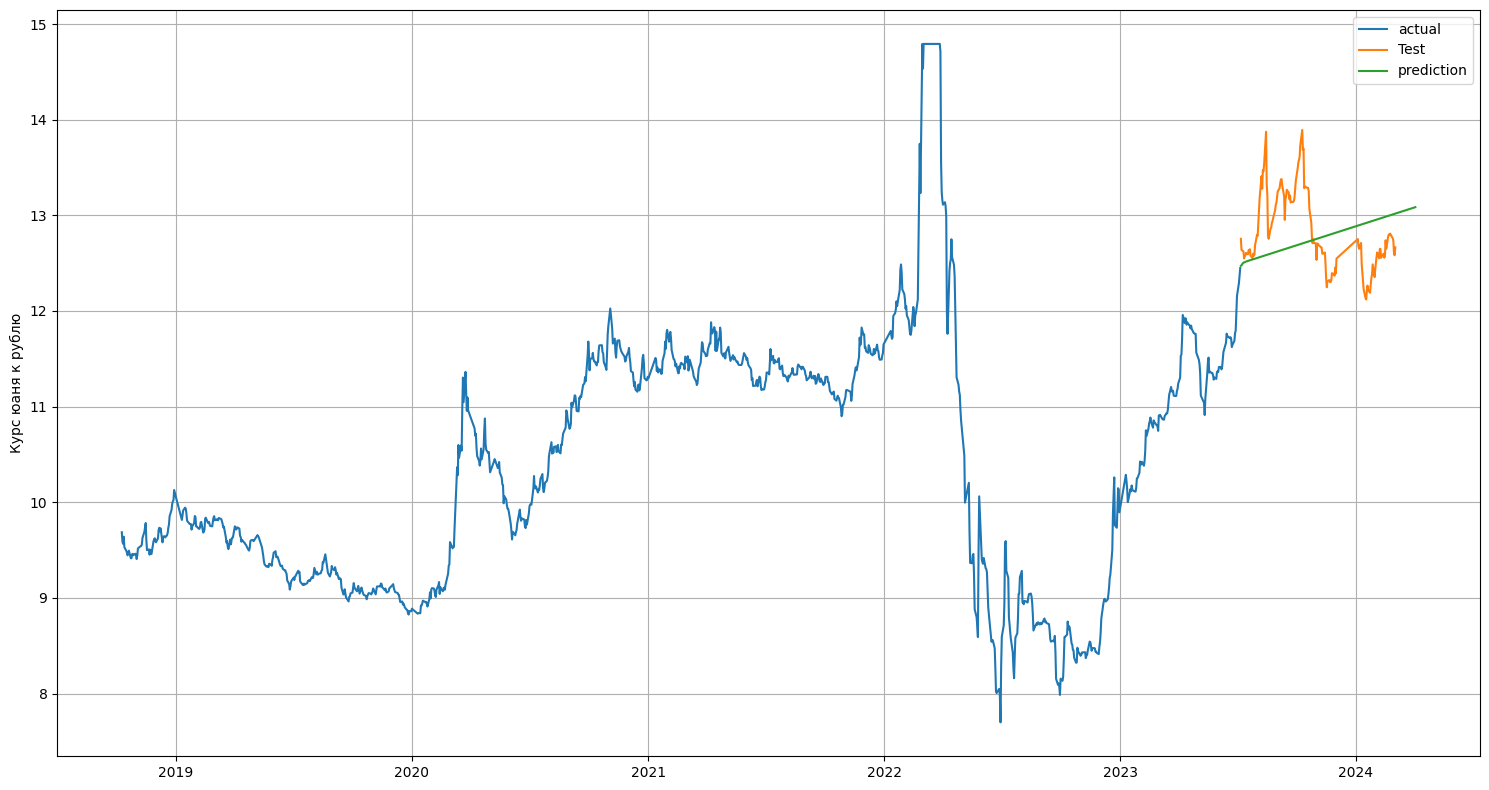

In [ ]:
#Теперь нам нужно построить результаты нашей модели:
plt.plot(train,label='actual')
plt.plot(test,label='Test')
plt.plot(ts_p,label='prediction')
#plt.fill_between(ts_ci.index[1:],ts_ci.iloc[1:, 0],ts_ci.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Курс юаня к рублю')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# check error rate
#mse = mean_squared_error(test.Y, prediction, squared=False)
#rmse = mean_squared_error(test.Y, prediction, squared=True)
#print("The error rates of the SARIMAX forecasting are: \nMSE = %f \nRMSE = %f" %(mse, rmse))

In [ ]:
mape = metrics.mean_absolute_percentage_error(test,ts_p)
mape

In [ ]:
mae = metrics.mean_absolute_error(test,ts_p)
mae

In [ ]:
mse = metrics.mean_squared_error(test,ts_p)
mse

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y = train['Y']

In [ ]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [ ]:
ARMAmodel = ARMAmodel.fit()

In [ ]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [ ]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.ylabel('CNY Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for CNY Data")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test["Y"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()


y_pred2 = ARIMAmodel.get_forecast(len(test.index))
y_pred_df2 = y_pred2.conf_int(alpha = 0.05)
y_pred_df2["Predictions"] = ARIMAmodel.predict(start = y_pred_df2.index[0], end = y_pred_df2.index[-1])
y_pred_df2.index = test.index
y_pred_out2 = y_pred_df2["Predictions"]

plt.plot(y_pred_out2, color='Orange', label = 'ARIMA Predictions')
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.ylabel('CNY Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for CNY Data")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Y"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (7, 1, 3), seasonal_order=(7,1,3,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred3 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df3 = y_pred3.conf_int(alpha = 0.05)
y_pred_df3["Predictions"] = SARIMAXmodel.predict(start = y_pred_df3.index[0], end = y_pred_df3.index[-1])
y_pred_df3.index = test.index
y_pred_out3 = y_pred_df3["Predictions"]

In [ ]:
plt.plot(y_pred_out3, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out2, color='Orange', label = 'ARIMA Predictions')
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.ylabel('CNY Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for CNY Data")
plt.show()